In [140]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [88]:
pd.set_option('precision', 3)

# Constantes

In [267]:
k = 10
L0 = 1.986
m0 = 0.993
a = 1
grav = 9.81

In [6]:
tolerancia = 0.5*(10**(-15)) #0,5 * 10exp(-15)

# Funciones

In [358]:
class Function:
    coef = 1    
    def __init__(self,c):
        self.coef = c
    def calc(self,x):
        return f(x)-(m0*self.coef*grav)   
class Function_g:
    coef = 1    
    def __init__(self,c):
        self.coef = c
    def calc(self,x):
        return (-m0*self.coef*grav)/(2*k) + ((x*L0)/(np.sqrt(x**2+a**2))) 

In [352]:
def f (x):
    return -2*k*x*(1-(L0)/np.sqrt(x**2+a**2))
#def f_m (x,coef):
    #a = f(x)
    #return (a)-(m0*coef*g)
def der_f(x):
    return ((-2*k*L0*x**2) / ((a**2+x**2)**(3/2))) - 2*k*(1-(L0/np.sqrt(a**2+x**2)))

def g(x):
    return (x*L0)/(np.sqrt(x**2+a**2))


In [172]:
def nr (p0,f,der_f,max_iter,tol,true_root = "None"):
    output = []
    cols = ["y","deltay","deltay/y","lambda","p"]
    c = True
    i = 0
    p = p0
    while (c and (i<=max_iter) and (f(p)!= 0)):
        old_p = p
        p = p - f(p)/der_f(p)
        output.append([old_p,np.abs(p-old_p),np.abs(p-old_p)/old_p,0,p])
        c = (np.abs(p-old_p) >= tol) if (true_root == 'None') else (np.abs(p-true_root) >= tol)
        i+=1
    df = pd.DataFrame(output)
    df.columns = cols
    return df
        

In [235]:
def biseccion (a,b,f,max_iter,tol,true_root = "None"):
    cols = ["a","b","f(a)","f(b)","r","\Delta r","\Delta r/r","\lambda","p"]
    
    #primera iteracion es "especial" y la hago fuera
    r = (a+b)/2
    output=[]
    interval = f(a)*f(r)<0
    b = r*interval+b*(~interval)
    a = r*(~interval)+a*interval
    #fin de la primera iteracion
    
    c= True
    i=0
    while (c and (i<=max_iter) and f(r)!=0 ):
        old_r = r
        r = (a+b)/2
        
        table_entry = [a,b,f(a),f(b),r,np.abs(r-old_r),0,0,0]
        table_entry[6]=table_entry[5]/table_entry[4]
        
        if f(a)*f(r) < 0:
            b=r
        else:
            a=r
            
        if (true_root == "None"):
            c = (table_entry[5] >= tol)
        else:
            c = (np.abs(r-true_root) >= tol)
        output.append(table_entry)
        i+=1
    df = pd.DataFrame(output)
    df.columns = cols
    return df;
            

In [241]:
def pfijo (p0,g,max_iter,tol,true_root='None'):
    output = []
    p = p0
    i=0
    c = True
    while (c and (i<max_iter) and (g(p)!=p)):
        old_p = p
        p = g(p)
        output.append([old_p,np.abs(p-old_p),np.abs(p-old_p)/old_p,0,p])
        c = !(np.abs(p-true_root) < tol) if (true_root != 'None') else !(np.abs(p-old_p) < tol)
        i+=1
    return pd.DataFrame(output).rename(columns=pd.Series(['y','\Delta y','\Delta y/y','\lambda','p']))

# Item 1

In [236]:
bisec1 = biseccion(1,2,f,200,tolerancia,np.sqrt(L0**2-a**2))

In [237]:
bisec1

,a,b,f(a),f(b),r,\Delta r,\Delta r/r,\lambda,p
0,1.500000000000,2.000000000000,3.049037691099e+00,-4.473351973483e+00,1.750000000000,2.500000000000e-01,1.428571428571e-01,0,0
1,1.500000000000,1.750000000000,3.049037691099e+00,-5.133823948165e-01,1.625000000000,1.250000000000e-01,7.692307692308e-02,0,0
2,1.625000000000,1.750000000000,1.327868339504e+00,-5.133823948165e-01,1.687500000000,6.250000000000e-02,3.703703703704e-02,0,0
3,1.687500000000,1.750000000000,4.207797159494e-01,-5.133823948165e-01,1.718750000000,3.125000000000e-02,1.818181818182e-02,0,0
4,1.687500000000,1.718750000000,4.207797159494e-01,-4.308402618355e-02,1.703125000000,1.562500000000e-02,9.174311926606e-03,0,0
5,1.703125000000,1.718750000000,1.896723129420e-01,-4.308402618355e-02,1.710937500000,7.812500000000e-03,4.566210045662e-03,0,0
6,1.710937500000,1.718750000000,7.349769931755e-02,-4.308402618355e-02,1.714843750000,3.906250000000e-03,2.277904328018e-03,0,0
7,1.714843750000,1.718750000000,1.525740928013e-02,-4.308402618355e-02,1.716796875000,1.953125000000e-03,1.137656427759e-03,0,0
8,1.714843750000,1.716796875000,1.525740928013e-02,-1.390070456840e-02,1.715820312500,9.765625000000e-04,5.691519635743e-04,0,0
9,1.715820312500,1.716796875000,6.815082279386e-04,-1.390070456840e-02,1.716308593750,4.882812500000e-04,2.844950213371e-04,0,0


In [245]:
nr1 = nr(der_f=der_f,f=f,p0=2,tol=tolerancia,true_root=np.sqrt(L0**2-a**2),max_iter=30)

In [246]:
pd.set_option('precision',12)
nr1

,y,deltay,deltay/y,lambda,p
0,2.000000000000,0.271980349388,0.135990174694,0,1.728019650612
1,1.728019650612,0.012121540016,0.007014700331,0,1.715898110596
2,1.715898110596,0.000032148236,0.000018735515,0,1.715865962360
3,1.715865962360,0.000000000229,0.000000000133,0,1.715865962131


In [242]:
pf1 = pfijo(1.5,g,200,tolerancia,true_root=np.sqrt(L0**2-a**2))

In [243]:
pf1

,y,\Delta y,\Delta y/y,\lambda,p
0,1.500000000000,1.524518845550e-01,1.016345897033e-01,0,1.652451884555
1,1.652451884555,4.664790120649e-02,2.822950649425e-02,0,1.699099785761
2,1.699099785761,1.246840392906e-02,7.338241128358e-03,0,1.711568189691
3,1.711568189691,3.205064774464e-03,1.872589589927e-03,0,1.714773254465
4,1.714773254465,8.154680781960e-04,4.755544653339e-04,0,1.715588722543
5,1.715588722543,2.069363495019e-04,1.206211878072e-04,0,1.715795658893
6,1.715795658893,5.247794174501e-05,3.058519321519e-05,0,1.715848136834
7,1.715848136834,1.330587014303e-05,7.754689857099e-06,0,1.715861442705
8,1.715861442705,3.373580866661e-06,1.966114968668e-06,0,1.715864816285
9,1.715864816285,8.553310582027e-07,4.984839423739e-07,0,1.715865671616


#### Punto fijo no converge porque la 'g' usada no tiene |g'| < 1 en un intervalo que contiene al punto fijo, tenemos que usar una g distinta a la que dice el enunciado.

In [184]:
import seaborn as sns

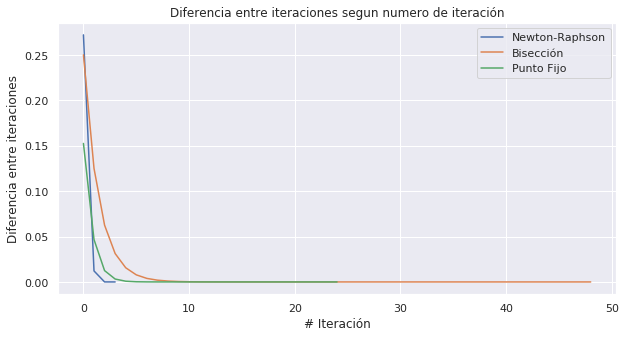

In [247]:
sns.set()
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(ax=ax,data=nr1['deltay'],label='Newton-Raphson')
sns.lineplot(ax=ax,data=bisec1['\Delta r'].astype(float),label='Bisección')
sns.lineplot(ax=ax,data=pf1['\Delta y'].astype(float),label='Punto Fijo')
plt.title('Diferencia entre iteraciones segun numero de iteración')
plt.xlabel('# Iteración')
plt.ylabel('Diferencia entre iteraciones')
plt.show()

### No se puede tomar dos iteraciones consecutivas como cota del error absoluto de truncamiento, el error absoluto puede ser mayor a la diferencia entre dos iteraciones consecutivas.

## Item 2

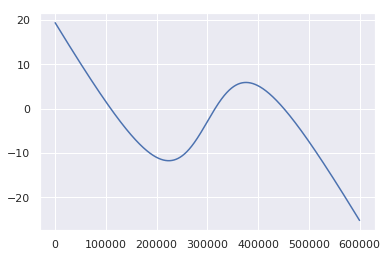

In [328]:
plt.plot(Function(0.3).calc(np.arange(-3,3,0.00001)))

#### La función tiene sólo una raíz

### Biseccion

In [329]:
bisec1=biseccion(a=-3,b=0,f=Function(0.3).calc,max_iter=200,tol=tolerancia)

In [330]:
bisec1

,a,b,f(a),f(b),r,\Delta r,\Delta r/r,\lambda,p
0,-3.000000000000,-1.500000000000,1.939590040143e+01,-5.971436691099e+00,-2.250000000000,7.500000000000e-01,-3.333333333333e-01,0,0
1,-2.250000000000,-1.500000000000,5.781006288803e+00,-5.971436691099e+00,-1.875000000000,3.750000000000e-01,-2.000000000000e-01,0,0
2,-2.250000000000,-1.875000000000,5.781006288803e+00,-4.694578235294e-01,-2.062500000000,1.875000000000e-01,-9.090909090909e-02,0,0
3,-2.062500000000,-1.875000000000,2.586984662167e+00,-4.694578235294e-01,-1.968750000000,9.375000000000e-02,-4.761904761905e-02,0,0
4,-1.968750000000,-1.875000000000,1.039088359363e+00,-4.694578235294e-01,-1.921875000000,4.687500000000e-02,-2.439024390244e-02,0,0
5,-1.921875000000,-1.875000000000,2.795410908424e-01,-4.694578235294e-01,-1.898437500000,2.343750000000e-02,-1.234567901235e-02,0,0
6,-1.921875000000,-1.898437500000,2.795410908424e-01,-9.632458214992e-02,-1.910156250000,1.171875000000e-02,-6.134969325153e-03,0,0
7,-1.910156250000,-1.898437500000,9.127281250885e-02,-9.632458214992e-02,-1.904296875000,5.859375000000e-03,-3.076923076923e-03,0,0
8,-1.910156250000,-1.904296875000,9.127281250885e-02,-2.610499491006e-03,-1.907226562500,2.929687500000e-03,-1.536098310292e-03,0,0
9,-1.907226562500,-1.904296875000,4.431009772308e-02,-2.610499491006e-03,-1.905761718750,1.464843750000e-03,-7.686395080707e-04,0,0


In [343]:
bisec2=biseccion(a=0,b=1,f=Function(0.3).calc,max_iter=200,tol=tolerancia)

In [344]:
bisec2

,a,b,f(a),f(b),r,\Delta r,\Delta r/r,\lambda,p
0,0.000000000000,0.500000000000,-2.922399000000e+00,4.840925013258e+00,0.250000000000,2.500000000000e-01,1.000000000000e+00,0,0
1,0.000000000000,0.250000000000,-2.922399000000e+00,1.711116026443e+00,0.125000000000,1.250000000000e-01,1.000000000000e+00,0,0
2,0.125000000000,0.250000000000,-4.957393421166e-01,1.711116026443e+00,0.187500000000,6.250000000000e-02,3.333333333333e-01,0,0
3,0.125000000000,0.187500000000,-4.957393421166e-01,6.475416121934e-01,0.156250000000,3.125000000000e-02,2.000000000000e-01,0,0
4,0.125000000000,0.156250000000,-4.957393421166e-01,8.445068446777e-02,0.140625000000,1.562500000000e-02,1.111111111111e-01,0,0
5,0.140625000000,0.156250000000,-2.036970968278e-01,8.445068446777e-02,0.148437500000,7.812500000000e-03,5.263157894737e-02,0,0
6,0.148437500000,0.156250000000,-5.911207735755e-02,8.445068446777e-02,0.152343750000,3.906250000000e-03,2.564102564103e-02,0,0
7,0.148437500000,0.152343750000,-5.911207735755e-02,1.280007925993e-02,0.150390625000,1.953125000000e-03,1.298701298701e-02,0,0
8,0.150390625000,0.152343750000,-2.312367717436e-02,1.280007925993e-02,0.151367187500,9.765625000000e-04,6.451612903226e-03,0,0
9,0.151367187500,0.152343750000,-5.153671847236e-03,1.280007925993e-02,0.151855468750,4.882812500000e-04,3.215434083601e-03,0,0


In [345]:
bisec3=biseccion(a=1,b=2,f=Function(0.3).calc,max_iter=200,tol=tolerancia)

In [346]:
bisec3

,a,b,f(a),f(b),r,\Delta r,\Delta r/r,\lambda,p
0,1.500000000000,2.000000000000,1.266386910992e-01,-7.395750973483e+00,1.750000000000,2.500000000000e-01,1.428571428571e-01,0,0
1,1.500000000000,1.750000000000,1.266386910992e-01,-3.435781394816e+00,1.625000000000,1.250000000000e-01,7.692307692308e-02,0,0
2,1.500000000000,1.625000000000,1.266386910992e-01,-1.594530660496e+00,1.562500000000,6.250000000000e-02,4.000000000000e-02,0,0
3,1.500000000000,1.562500000000,1.266386910992e-01,-7.173789657248e-01,1.531250000000,3.125000000000e-02,2.040816326531e-02,0,0
4,1.500000000000,1.531250000000,1.266386910992e-01,-2.910145587805e-01,1.515625000000,1.562500000000e-02,1.030927835052e-02,0,0
5,1.500000000000,1.515625000000,1.266386910992e-01,-8.107101695020e-02,1.507812500000,7.812500000000e-03,5.181347150259e-03,0,0
6,1.507812500000,1.515625000000,2.306665296187e-02,-8.107101695020e-02,1.511718750000,3.906250000000e-03,2.583979328165e-03,0,0
7,1.507812500000,1.511718750000,2.306665296187e-02,-2.893193015849e-02,1.509765625000,1.953125000000e-03,1.293661060802e-03,0,0
8,1.507812500000,1.509765625000,2.306665296187e-02,-2.915019361607e-03,1.508789062500,9.765625000000e-04,6.472491909385e-04,0,0
9,1.508789062500,1.509765625000,1.008022866491e-02,-2.915019361607e-03,1.509277343750,4.882812500000e-04,3.235198964736e-04,0,0


### Newton-Raphson

In [347]:
nr1 = nr(f=Function(0.3).calc,der_f=der_f,p0=-2,max_iter=20,tol=tolerancia)

In [348]:
nr1

,y,deltay,deltay/y,lambda,p
0,-2.000000000000,9.429813127013e-02,-4.714906563506e-02,0,-1.905701868730
1,-1.905701868730,1.241689756940e-03,-6.515655871016e-04,0,-1.904460178973
2,-1.904460178973,2.369941927149e-07,-1.244416634864e-07,0,-1.904459941979
3,-1.904459941979,8.881784197001e-15,-4.663676038139e-15,0,-1.904459941979
4,-1.904459941979,2.220446049250e-16,-1.165919009535e-16,0,-1.904459941979


In [349]:
nr2 = nr(f=Function(0.3).calc,der_f=der_f,p0=0.5,max_iter=20,tol=tolerancia)

In [350]:
nr2

,y,deltay,deltay/y,lambda,p
0,0.500000000000,0.574841701872,1.149683403744,0,-0.074841701872
1,-0.074841701872,0.226421057817,-3.025332831200,0,0.151579355945
2,0.151579355945,0.000068063586,0.000449029390,0,0.151647419531
3,0.151647419531,0.000000002150,0.000000014177,0,0.151647421680
4,0.151647421680,0.000000000000,0.000000000000,0,0.151647421680


In [351]:
nr3 = nr(f=Function(0.3).calc,der_f=der_f,p0=1.5,max_iter=20,tol=tolerancia)
nr3

,y,deltay,deltay/y,lambda,p
0,1.500000000000,9.578811502448e-03,6.385874334966e-03,0,1.509578811502
1,1.509578811502,3.218540926220e-05,2.132078763756e-05,0,1.509546626093
2,1.509546626093,3.596003494977e-10,2.382174510425e-10,0,1.509546625734
3,1.509546625734,2.220446049250e-16,1.470935717650e-16,0,1.509546625734


### Punto fijo

In [361]:
pf1 = pfijo(g=Function_g(0.3).calc,p0=-2,max_iter=200,tol=tolerancia)
pf2 = pfijo(g=Function_g(0.3).calc,p0=0.5,max_iter=200,tol=tolerancia)
pf3 = pfijo(g=Function_g(0.3).calc,p0=1.5,max_iter=200,tol=tolerancia)

In [362]:
pf1

,y,\Delta y,\Delta y/y,\lambda,p
0,-2.000000000000,7.754764867417e-02,-3.877382433708e-02,0,-1.922452351326
1,-1.922452351326,1.444168461074e-02,-7.512115762339e-03,0,-1.908010666715
2,-1.908010666715,2.843756066893e-03,-1.490429857915e-03,0,-1.905166910648
3,-1.905166910648,5.659602062291e-04,-2.970659437060e-04,0,-1.904600950442
4,-1.904600950442,1.128737872413e-04,-5.926374614858e-05,0,-1.904488076655
5,-1.904488076655,2.252072107778e-05,-1.182507853624e-05,0,-1.904465555934
6,-1.904465555934,4.493738428035e-06,-2.359579785538e-06,0,-1.904461062195
7,-1.904461062195,8.966862914406e-07,-4.708346677390e-07,0,-1.904460165509
8,-1.904460165509,1.789265207108e-07,-9.395130649163e-08,0,-1.904459986582
9,-1.904459986582,3.570336826186e-08,-1.874723990706e-08,0,-1.904459950879


In [363]:
pf2

,y,\Delta y,\Delta y/y,\lambda,p
0,0.500000000000,2.420462506629e-01,4.840925013258e-01,0,0.742046250663
1,0.742046250663,2.952997264840e-01,3.979532626440e-01,0,1.037345977147
2,1.037345977147,2.463500003432e-01,2.374810388919e-01,0,1.283695977490
3,1.283695977490,1.369086456803e-01,1.066519238831e-01,0,1.420604623170
4,1.420604623170,5.726933729082e-02,4.031335415691e-02,0,1.477873960461
5,1.477873960461,2.084174423304e-02,1.410251807030e-02,0,1.498715704694
6,1.498715704694,7.180512022064e-03,4.791110148225e-03,0,1.505896216716
7,1.505896216716,2.426193860958e-03,1.611129528068e-03,0,1.508322410577
8,1.508322410577,8.143456779615e-04,5.399015968010e-04,0,1.509136756255
9,1.509136756255,2.727216039173e-04,1.807136449278e-04,0,1.509409477859


In [364]:
pf3

,y,\Delta y,\Delta y/y,\lambda,p
0,1.500000000000,6.331934554958e-03,4.221289703305e-03,0,1.506331934555
1,1.506331934555,2.136924834725e-03,1.418628116224e-03,0,1.508468859390
2,1.508468859390,7.169647062137e-04,4.752930110230e-04,0,1.509185824096
3,1.509185824096,2.400766184953e-04,1.590769106509e-04,0,1.509425900714
4,1.509425900714,8.033686054665e-05,5.322345436674e-05,0,1.509506237575
5,1.509506237575,2.687718247962e-05,1.780528083329e-05,0,1.509533114757
6,1.509533114757,8.991258142466e-06,5.956317257678e-06,0,1.509542106016
7,1.509542106016,3.007782549247e-06,1.992513184800e-06,0,1.509545113798
8,1.509545113798,1.006164071171e-06,6.665346149474e-07,0,1.509546119962
9,1.509546119962,3.365812903944e-07,2.229685373262e-07,0,1.509546456543


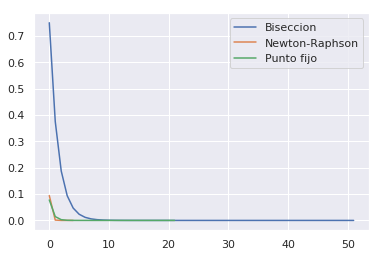

In [370]:
sns.lineplot(data=bisec1['\Delta r'],label='Biseccion')
sns.lineplot(data=nr1['deltay'],label='Newton-Raphson')
sns.lineplot(data=pf1['\Delta y'],label='Punto fijo')

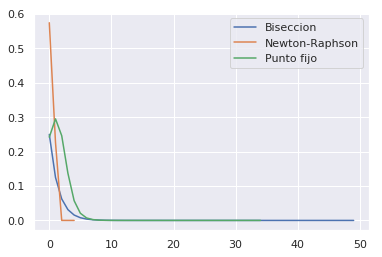

In [371]:
sns.lineplot(data=bisec2['\Delta r'],label='Biseccion')
sns.lineplot(data=nr2['deltay'],label='Newton-Raphson')
sns.lineplot(data=pf2['\Delta y'],label='Punto fijo')

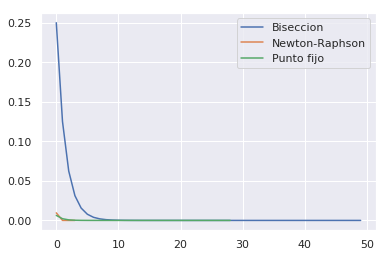

In [372]:
sns.lineplot(data=bisec3['\Delta r'],label='Biseccion')
sns.lineplot(data=nr3['deltay'],label='Newton-Raphson')
sns.lineplot(data=pf3['\Delta y'],label='Punto fijo')